In [1]:
import torch
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

import torch.nn as nn

Creating Dataset.

In [2]:
n_pts = 500

X, y = datasets.make_circles(n_samples=n_pts, noise=0.1, factor=0.2, random_state=123)
#print(X)
#print(y)
x_data = torch.Tensor(X)
y_data = torch.Tensor(y.reshape(500,1))

In [3]:
def scatter_plot():
  plt.scatter(X[y==0,0],X[y==0,1])
  plt.scatter(X[y==1,0],X[y==1,1])

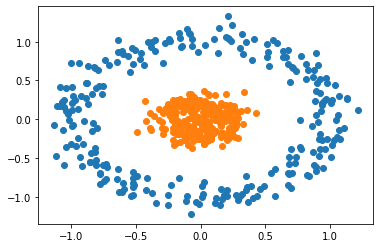

In [4]:
scatter_plot()

Building the deep neural network.

In [5]:
class Model(nn.Module):
  def __init__(self, input_size, H1, output_size): 
    super().__init__()
    self.linear=nn.Linear(input_size, H1)
    self.linear2=nn.Linear(H1, output_size)

  def forward(self, x):
    x=torch.sigmoid(self.linear(x))
    x=torch.sigmoid(self.linear2(x))
    return x

  def predict(self,x):
    pred=self.forward(x)
    if pred>=0.5:
      return 1
    else:
      return 0    

In [6]:
torch.manual_seed(2)
model = Model(2,4,1)
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.1622, -0.1683],
        [ 0.1939, -0.0361],
        [ 0.3021,  0.1683],
        [-0.0813, -0.5717]], requires_grad=True), Parameter containing:
tensor([ 0.1614, -0.6260,  0.0929,  0.0470], requires_grad=True), Parameter containing:
tensor([[-0.1099,  0.4088,  0.0334,  0.2073]], requires_grad=True), Parameter containing:
tensor([0.2116], requires_grad=True)]


In [7]:
criterion=nn.BCELoss()
optimizer=torch.optim.Adam(model.parameters(), lr=0.1)

In [8]:
epochs=1000
losses=[]
for i in range(epochs):
  y_pred=model.forward(x_data)
  loss=criterion(y_pred,y_data)
  print("epoch: ",i," loss:", loss.item())
  losses.append(loss.item())
  optimizer.zero_grad()
  loss.backward() #calculating gradient
  optimizer.step()#update model parameters

epoch:  0  loss: 0.7148522138595581
epoch:  1  loss: 0.6947318911552429
epoch:  2  loss: 0.6955163478851318
epoch:  3  loss: 0.7014891505241394
epoch:  4  loss: 0.7013982534408569
epoch:  5  loss: 0.6974702477455139
epoch:  6  loss: 0.693925678730011
epoch:  7  loss: 0.6928597688674927
epoch:  8  loss: 0.6939383149147034
epoch:  9  loss: 0.6954388618469238
epoch:  10  loss: 0.6958754062652588
epoch:  11  loss: 0.6949177384376526
epoch:  12  loss: 0.6931490302085876
epoch:  13  loss: 0.6913898587226868
epoch:  14  loss: 0.6901612877845764
epoch:  15  loss: 0.6894590854644775
epoch:  16  loss: 0.6888433694839478
epoch:  17  loss: 0.6877668499946594
epoch:  18  loss: 0.6859008073806763
epoch:  19  loss: 0.6832481622695923
epoch:  20  loss: 0.6800421476364136
epoch:  21  loss: 0.6765591502189636
epoch:  22  loss: 0.6729680895805359
epoch:  23  loss: 0.6692698001861572
epoch:  24  loss: 0.6653285622596741
epoch:  25  loss: 0.6609664559364319
epoch:  26  loss: 0.6560586094856262
epoch:  27  

Text(0.5, 0, 'EPOCHS')

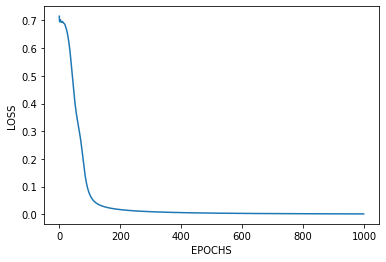

In [9]:
plt.plot(range(epochs),losses)
plt.ylabel('LOSS')
plt.xlabel("EPOCHS")

Testing the Model and Plotting contour zones.

In [10]:
def plot_decision_boundary(X, y):
  x_span = np.linspace(min(X[:,0])-0.25, max(X[:,0])+0.25)
  y_span = np.linspace(min(X[:,1])-0.25, max(X[:,1])+0.25)
  xx,yy = np.meshgrid(x_span,y_span)
  grid = torch.Tensor(np.c_[xx.ravel(), yy.ravel()]) #for flattening out, making it 1D
  pred_func = model.forward(grid) #returns tensor of predictions by feeding entire grid
  z = pred_func.view(xx.shape).detach().numpy()#use detach to exclude any subgraphs from any computation that would be associated with values from predfunc
  plt.contourf(xx,yy,z) #allow shape of our prediction data to be consistent with 50*50 shape of our graph
  #every single point in the graph associated with a corresponding prediction
  #z contains magnitude of probability and each corresponding coordinate, also allows xx,yy to corelate with z

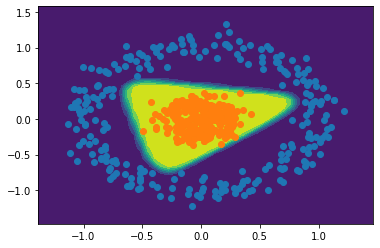

In [11]:
plot_decision_boundary(X, y)
scatter_plot()

prediction:  1


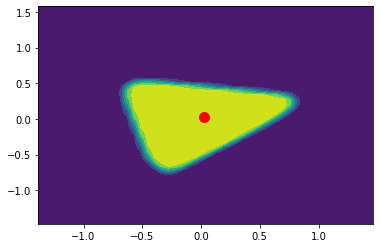

In [12]:
x = 0.025
y = 0.025
point = torch.Tensor([x,y])
prediction = model.predict(point)
plt.plot([x],[y],marker = 'o',markersize=10,color='red')
print("prediction: ",prediction)
plot_decision_boundary(X,y)